# Librerias exportadas

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Preprocesado
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# GMM
from sklearn.mixture import GaussianMixture

# MLP
from sklearn.neural_network import MLPClassifier

# SVM
from sklearn.svm import SVC

# Scoring
from sklearn.metrics import classification_report

# Balance de clases
from imblearn.over_sampling import ADASYN, SMOTE

# StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Lime para explicar predicciones
import lime
import lime.lime_tabular

# Guardar modelos
import joblib
import os

# Descripción del DataFrame

In [2]:
df0 = pd.read_csv('Accidentes/Siniestros_de_tránsito_en_rutas_de_Chile_2022.csv')
df1 = pd.read_csv('Accidentes/Siniestros_de_tránsito_en_rutas_de_Chile_2021.csv')
#df2 = pd.read_csv('Accidentes/Siniestros_de_tránsito_en_rutas_de_Chile_2020.csv')
#df3 = pd.read_csv('Accidentes/Siniestros_de_tránsito_en_rutas_de_Chile_2015_-_2019.csv')

df = pd.concat([df0, df1])

In [3]:
df

,X,Y,FID,OBJECTID,Año,Idaccident,Claseaccid,Fecha,Cód_Regi,Región,...,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Ruta,Cód_Ruta,Hora,Ubicaci_1,ubicaci_12
0,-70.942640,-53.156797,1,1,2022,1482281,1,2022/10/14 00:00:00+00,12,REGION MAGALLANES Y ANTARTICA CHILENA,...,0,0,0,1,1,Y-570,,09:30:00,NaN,NaN
1,-72.875717,-51.254941,2,2,2022,1415624,1,2022/01/19 00:00:00+00,12,REGION MAGALLANES Y ANTARTICA CHILENA,...,0,2,2,4,0,Y-290,,19:30:00,NaN,NaN
2,-71.091263,-52.790777,3,3,2022,1471563,1,2022/08/27 00:00:00+00,12,REGION MAGALLANES Y ANTARTICA CHILENA,...,0,0,0,1,0,Y-50,,11:30:00,NaN,NaN
3,-73.810130,-42.574437,4,3038,2022,1464717,1,2022/08/03 00:00:00+00,10,REGION LOS LAGOS,...,0,0,0,1,0,RUTA 5 SUR,70A005,04:50:00,NaN,NaN
4,-72.781522,-51.392576,5,4,2022,1443105,1,2022/04/16 00:00:00+00,12,REGION MAGALLANES Y ANTARTICA CHILENA,...,0,0,0,0,4,Y-290,,09:30:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15761,-70.795139,-28.569268,15762,18570,2021,1405122,1,2021/12/16 00:00:00+00,3,REGION ATACAMA,...,0,0,0,0,2,C-46,63B046,08:30:00,1,1000.0
15762,-70.856342,-28.916845,15763,17114,2021,1399594,1,2021/11/22 00:00:00+00,3,REGION ATACAMA,...,0,0,0,0,1,RUTA 5 NORTE,63A005,09:25:00,620,620000.0
15763,-70.039986,-27.236630,15764,1667,2021,1330309,1,2021/02/02 00:00:00+00,3,REGION ATACAMA,...,0,0,0,0,1,"31 CH, C-17, C-13",63B017,16:30:00,17,17000.0
15764,-70.825436,-28.870585,15765,13700,2021,1381900,1,2021/09/21 00:00:00+00,3,REGION ATACAMA,...,0,0,0,1,0,RUTA 5 NORTE,63A005,07:10:00,626,626000.0


In [4]:
df.columns

Index(['X', 'Y', 'FID', 'OBJECTID', 'Año', 'Idaccident', 'Claseaccid', 'Fecha',
       'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna', 'Cód_Tipo_', 'Tipo_Accid',
       'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona', 'Cód_Ubica', 'Ubicación',
       'Cód_Causa', 'Causa', 'Cód_Cau_1', 'Causa__CON', 'Cód_Calle',
       'ubicaci_1', 'Ubicaci_12', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza',
       'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal',
       'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'Ruta', 'Cód_Ruta', 'Hora',
       'Ubicaci_1', 'ubicaci_12'],
      dtype='object')

* X:
* Y:
* FID:
* OBJECTID:
* Año:
* Idaccident:
* Claseaccid:
* Fecha:
* Cód_Regi:
* Región:
* Cód_Comun:
* Comuna:
* Cód_Tipo_:
* Tipo_Accid:
* Cód_Tipo1:
* Tipo__CONA:
* Cód_Zona:
* Zona:
* Cód_Ubica:
* Ubicación:
* Cód_Causa:
* Causa:
* Cód_Cau_1:
* Causa__CON:
* Cód_Calle:
* ubicaci_1:
* Ubicaci_12:
* Pistas_de_:
* Pistas_de1:
* Cód_Calza:
* Calzada:
* Cód__Tipo:
* Tipo_Calza:
* Cód_Estad:
* Estado_Cal:
* Cód_Condi:
* Condición:
* Cód_Est_1:
* Estado_Atm:
* Fallecidos:
* Graves:
* Menos_Grav:
* Leves:
* Ilesos:
* Ruta:
* Cód_Ruta:
* Hora:
* OrdinalEncodedDates:

# Preprocesado de datos

In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['OrdinalEncodedDates'] = df['Fecha'].apply(pd.Timestamp.toordinal)

In [6]:
df['Hora'] = pd.to_datetime(df['Hora']).dt.hour

### Eliminar los datos nulos

In [7]:
df_lower_dim = df[['OrdinalEncodedDates', 'Cód_Regi', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1',
                   'Cód_Zona', 'Cód_Ubica', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calza',
                   'Cód__Tipo', 'Cód_Estad', 'Cód_Condi', 'Cód_Est_1', 'Hora',
                   'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'Ilesos']]
df_lower_dim = df_lower_dim.dropna()
df_lower_dim

,OrdinalEncodedDates,Cód_Regi,Cód_Comun,Cód_Tipo_,Cód_Tipo1,Cód_Zona,Cód_Ubica,Cód_Causa,Cód_Cau_1,Cód_Calza,Cód__Tipo,Cód_Estad,Cód_Condi,Cód_Est_1,Hora,Fallecidos,Graves,Menos_Grav,Leves,Ilesos
0,738442,12,12101,10,10,2,1,31,1,2,4,2,1,2,9,0,0,0,1,1
1,738174,12,12402,70,70,2,1,1,12,2,5,2,0,1,19,0,2,2,4,0
2,738394,12,12102,51,40,2,1,24,4,2,2,2,2,1,11,0,0,0,1,0
3,738370,10,10203,70,70,2,1,24,4,2,2,1,1,1,4,0,0,0,1,0
4,738261,12,12402,40,99,2,1,27,1,2,5,1,0,1,9,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15761,738140,3,3301,53,40,1,26,1,27,1,2,1,1,1,8,0,0,0,0,2
15762,738116,3,3301,52,40,2,1,12,5,2,2,1,1,1,9,0,0,0,0,1
15763,737823,3,3202,70,70,2,1,9,95,2,6,2,0,1,16,0,0,0,0,1
15764,738054,3,3301,52,40,2,1,1,27,2,2,1,2,2,7,0,0,0,1,0


### Separación de labels

In [8]:
df_severity = df_lower_dim[['Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'Ilesos']]

### Se cambian los labels a 0 si no hay y 1 si hay

In [9]:
for severity in df_severity.columns:
  df_severity[severity] = df_severity[severity].apply(lambda x: 0 if x < 1 else 1)

/tmp/ipykernel_24421/3747851968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_severity[severity] = df_severity[severity].apply(lambda x: 0 if x < 1 else 1)


### Columnas a utilizar

In [10]:
#lower_dim_columns = ['OrdinalEncodedDates', 'Cód_Regi', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1',
#                   'Cód_Zona', 'Cód_Ubica', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calza',
#                   'Cód__Tipo', 'Cód_Estad', 'Cód_Condi', 'Cód_Est_1', 'Hora']

lower_dim_columns = ['Cód__Tipo', 'Cód_Cau_1', 'Cód_Tipo_', 'Cód_Tipo1',
                     'Cód_Condi', 'Cód_Ubica', 'Cód_Regi', 'Hora']

df_lower_dim = df_lower_dim[lower_dim_columns]

### Scaler

In [11]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(df_lower_dim)

# OverSample con SMOT

In [12]:
smote_ilesos = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled_ilesos, y_resampled_ilesos = smote_ilesos.fit_resample(X, df_severity['Ilesos'])
X_train_ilesos, X_test_ilesos, y_train_ilesos, y_test_ilesos = train_test_split(X_resampled_ilesos, y_resampled_ilesos, test_size=0.3)

In [13]:
smote_leves = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled_leves, y_resampled_leves = smote_leves.fit_resample(X, df_severity['Leves'])
X_train_leves, X_test_leves, y_train_leves, y_test_leves = train_test_split(X_resampled_leves, y_resampled_leves, test_size=0.3)

In [14]:
smote_menos_graves = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled_menos_graves, y_resampled_menos_graves = smote_menos_graves.fit_resample(X, df_severity['Menos_Grav'])
X_train_menos_graves, X_test_menos_graves, y_train_menos_graves, y_test_menos_graves = train_test_split(X_resampled_menos_graves, y_resampled_menos_graves, test_size=0.3)

In [15]:
smote_graves = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled_graves, y_resampled_graves = smote_graves.fit_resample(X, df_severity['Graves'])
X_train_graves, X_test_graves, y_train_graves, y_test_graves = train_test_split(X_resampled_graves, y_resampled_graves, test_size=0.3)

In [16]:
smote_fallecidos = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled_fallecidos, y_resampled_fallecidos = smote_fallecidos.fit_resample(X, df_severity['Fallecidos'])
X_train_fallecidos, X_test_fallecidos, y_train_fallecidos, y_test_fallecidos = train_test_split(X_resampled_fallecidos, y_resampled_fallecidos, test_size=0.3)

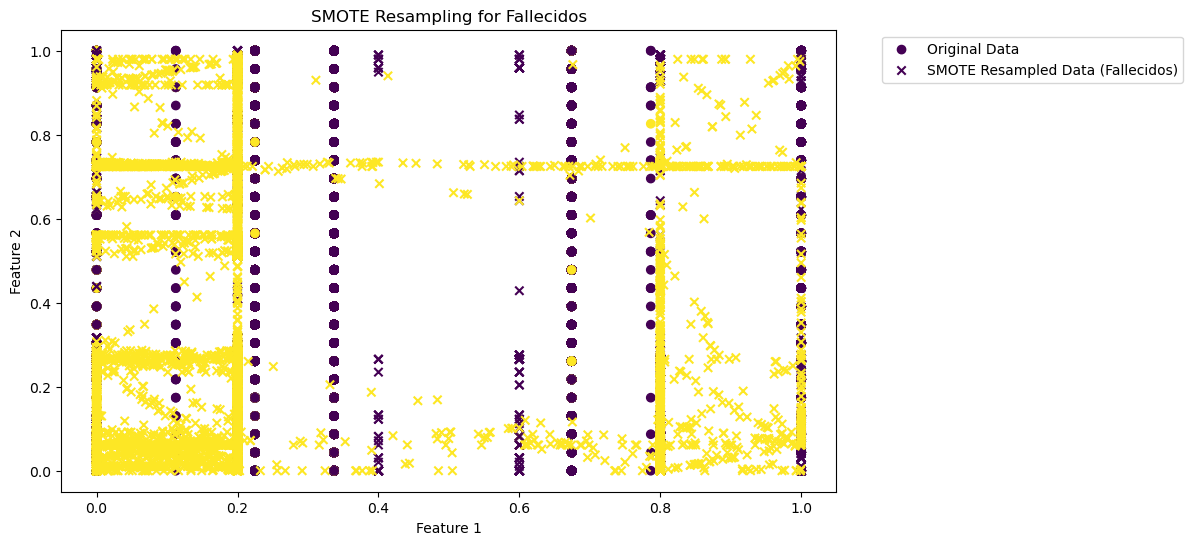

In [17]:
# Plot the SMOTE results for Fallecidos
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X[:, 3], X[:, 7], c=df_severity['Fallecidos'], cmap='viridis', label='Original Data')

# Plot the resampled data for Fallecidos
plt.scatter(X_resampled_fallecidos[:, 0], X_resampled_fallecidos[:, 1], c=y_resampled_fallecidos, cmap='viridis', marker='x', label='SMOTE Resampled Data (Fallecidos)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SMOTE Resampling for Fallecidos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# StackingClassifier

### Ilesos

In [18]:
# Define the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier_ilesos = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Fit the stacking classifier to the training data
stacking_classifier_ilesos.fit(X_train_ilesos, y_train_ilesos)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('random_forest', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [19]:
y_preds_ilesos = stacking_classifier_ilesos.predict(X_test_ilesos)

In [20]:
print(classification_report(y_test_ilesos, y_preds_ilesos))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      6719
           1       0.79      0.80      0.79      6798

    accuracy                           0.79     13517
   macro avg       0.79      0.79      0.79     13517
weighted avg       0.79      0.79      0.79     13517



### Leves

In [21]:
# Define the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier_leves = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Fit the stacking classifier to the training data
stacking_classifier_leves.fit(X_train_leves, y_train_leves)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('random_forest', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [22]:
y_preds_leves = stacking_classifier_leves.predict(X_test_leves)

In [23]:
print(classification_report(y_test_leves, y_preds_leves))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      5395
           1       0.61      0.60      0.61      5476

    accuracy                           0.61     10871
   macro avg       0.61      0.61      0.61     10871
weighted avg       0.61      0.61      0.61     10871



### Menos Graves

In [24]:
# Define the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier_menos_graves = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Fit the stacking classifier to the training data
stacking_classifier_menos_graves.fit(X_train_menos_graves, y_train_menos_graves)

In [25]:
y_preds_menos_graves = stacking_classifier_menos_graves.predict(X_test_menos_graves)

In [26]:
print(classification_report(y_test_menos_graves, y_preds_menos_graves))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9121
           1       0.95      0.91      0.93      9094

    accuracy                           0.93     18215
   macro avg       0.93      0.93      0.93     18215
weighted avg       0.93      0.93      0.93     18215



### Graves

In [27]:
# Define the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier_graves = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Fit the stacking classifier to the training data
stacking_classifier_graves.fit(X_train_graves, y_train_graves)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('random_forest', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [28]:
y_preds_graves = stacking_classifier_graves.predict(X_test_graves)

In [29]:
print(classification_report(y_test_graves, y_preds_graves))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8613
           1       0.91      0.87      0.89      8582

    accuracy                           0.89     17195
   macro avg       0.89      0.89      0.89     17195
weighted avg       0.89      0.89      0.89     17195



### Fallecidos

In [30]:

# Define the base classifiers
base_classifiers = [
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC())
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier_fallecidos = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)

# Fit the stacking classifier to the training data
stacking_classifier_fallecidos.fit(X_train_fallecidos, y_train_fallecidos)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('random_forest', RandomForestClassifier()),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [31]:
y_preds_fallecidos = stacking_classifier_fallecidos.predict(X_test_fallecidos)

In [32]:
print(classification_report(y_test_fallecidos, y_preds_fallecidos))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9382
           1       0.97      0.96      0.97      9421

    accuracy                           0.97     18803
   macro avg       0.97      0.97      0.97     18803
weighted avg       0.97      0.97      0.97     18803



# Guardar modelo

In [33]:
directory = 'models'
filenames = ['stacking_classifier_ilesos.pkl', 'stacking_classifier_leves.pkl', 'stacking_classifier_menos_graves.pkl', 'stacking_classifier_graves.pkl', 'stacking_classifier_fallecidos.pkl']
stacking_classifiers = [stacking_classifier_ilesos, stacking_classifier_leves, stacking_classifier_menos_graves, stacking_classifier_graves, stacking_classifier_fallecidos]

for i, filename in enumerate(filenames):
    # Check if the directory exists
    if not os.path.exists(directory):
        # If the directory does not exist, create it
        os.makedirs(directory)
    
    # Save the model in the directory
    joblib.dump(stacking_classifiers[i], os.path.join(directory, filename))


### Testeo de modelo guardado

In [99]:
# Load the model
model = joblib.load('models/stacking_classifier_fallecidos.pkl')

# Use the model to make predictions
predictions = model.predict(X_test_fallecidos[1300].reshape(1,8))

In [90]:
predictions

array([1])

In [96]:
y_test_fallecidos.iloc[1300]

1

# Lime

In [98]:
num_dato = 1300

# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_fallecidos, feature_names=lower_dim_columns, class_names=['Not Fallecidos', 'Fallecidos'])

# Explain the predictions for the test data using the LIME explainer
explanation = explainer.explain_instance(X_test_fallecidos[num_dato], model.predict_proba, num_features=X_test_fallecidos.shape[1])

# Print the explanation
explanation.show_in_notebook()